# 第一步查看数据

## 导入相应库

In [27]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sys
# %matplotlib notebook
%matplotlib inline

In [28]:
# 解决matplotlib显示中文问题
# 仅适用于Windows
plt.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题
df=pd.read_csv(r'.\Titanic Machine Learning from Disaster\train.csv')
df_test=pd.read_csv(r'.\Titanic Machine Learning from Disaster\test.csv')
passengerId=df_test['PassengerId']
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [29]:
#数据的基本信息概览
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**可以看出有三列是有缺失值的，分别是 Age年龄,Cabin船舱号,Embarked上船地点**

In [30]:
#查看有缺失值的列
# len(df[df.isnull().values==True])    886行
df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

### 分别查看各列缺失值占的比例
***
- 可以看到Cabin缺失值过多，可以删除这一列
- Age这一列缺失值不是很多，可以通过插值，或者取平均值填补空缺
- Embarked这一列缺失值很少，可以直接删除有缺失值的行dropna()

In [31]:
age_none=df['Age'].isnull().values
cabin_none=df['Cabin'].isnull().values
embarked_none=df['Embarked'].isnull().values

print('Age的缺失值比例是：',len(age_none[age_none==True])/len(df))
print('Cabin的缺失值比例是：',len(cabin_none[cabin_none==True])/len(df))
print('Embarked的缺失值比例是：',len(embarked_none[embarked_none==True])/len(df))

Age的缺失值比例是： 0.19865319865319866
Cabin的缺失值比例是： 0.7710437710437711
Embarked的缺失值比例是： 0.002244668911335578


** 有缺失值的是Age年龄，Fare费用，Cabin船舱编号，这里Embarked是完整的 **

In [32]:
df_test.isnull().any()

PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
dtype: bool

In [33]:
age_none=df_test['Age'].isnull().values
cabin_none=df_test['Cabin'].isnull().values
Fare_none=df_test['Fare'].isnull().values

print('Age的缺失值比例是：',len(age_none[age_none==True])/len(df_test))
print('Cabin的缺失值比例是：',len(cabin_none[cabin_none==True])/len(df_test))
print('Fare的缺失值比例是：',len(Fare_none[Fare_none==True])/len(df_test))

Age的缺失值比例是： 0.20574162679425836
Cabin的缺失值比例是： 0.7822966507177034
Fare的缺失值比例是： 0.0023923444976076554


In [34]:
#对这三列进行处理,先删去Cabin列，然后按性别平均值填补Age，最后dropna()删去空缺行
df_s=df.drop(['Cabin','Ticket'],axis=1)#删除Cabin列
df_test.drop(['Cabin','Ticket'],axis=1,inplace=True)
combine=[df_s,df_test]

**按照性别填充数据**

## 进行数据转换

In [35]:
#对名字进行分类
for data in combine:
    data['Sex']=data['Sex'].map({'female':0,'male':1}).astype(int)
    
    data['title']=data['Name'].str.extract('([A-Za-z]+)\.',expand=False)
    pd.crosstab(data['title'], data['Sex'])
    data['title']=data['title'].replace(['Lady', 'Countess','Capt', 'Col',\
         'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'],'Rare')
    
    print(set(data['title'].values))
    data['title'] = data['title'].replace('Mlle', 'Miss')
    data['title'] = data['title'].replace('Ms', 'Miss')
    data['title'] = data['title'].replace('Mme', 'Mrs')
    
    title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
    data['title']=data['title'].map(title_mapping)
    data.drop(['Name','PassengerId'],axis=1,inplace=True)

{'Master', 'Miss', 'Mme', 'Mlle', 'Rare', 'Mrs', 'Ms', 'Mr'}
{'Master', 'Miss', 'Rare', 'Mrs', 'Ms', 'Mr'}


In [36]:
# df_s.isnull().any()
# # len(df_s)
df_test.isnull().any()

Pclass      False
Sex         False
Age          True
SibSp       False
Parch       False
Fare         True
Embarked    False
title       False
dtype: bool

In [37]:
#填补年龄
guess_ages = np.zeros((2,3))
for data in combine:
    for i in range(0,2):
        for j in range(0,3):
            guess_df=data[(data['Sex']==i)&(data['Pclass']==j+1)]['Age'].dropna()
            age_guess=guess_df.median()
            guess_ages[i,j] = int(age_guess/0.5 + 0.5 )* 0.5
    for i in range(0,2):
        for j in range(0,3):
            data.loc[(data['Age'].isnull())&(data['Sex']==i)&(data['Pclass']==j+1),'Age']=guess_ages[i,j]
    data['Age'] = data['Age'].astype(int)
# df_s.dropna(inplace=True)#删除很少有缺失值的Embarked列中所属行

In [38]:
df_s.isnull().any()
# # len(df_s)
# df_test.isnull().any()

Survived    False
Pclass      False
Sex         False
Age         False
SibSp       False
Parch       False
Fare        False
Embarked     True
title       False
dtype: bool

## 年龄分段处理

In [39]:
df_s['AgeBand']=pd.cut(df_s['Age'],5)
df_s[['AgeBand','Survived']].groupby(['AgeBand'],as_index=False).mean().sort_values(by='AgeBand',ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [40]:

for dataset in combine:
    dataset.loc[dataset['Age']<=16,'Age']=0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']=4
df_s.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,title,AgeBand
0,0,3,1,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,0,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,0,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,0,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,1,2,0,0,8.0500,S,1,"(32.0, 48.0]"


In [41]:
df_s.drop(['AgeBand'],axis=1,inplace=True)
combine=[df_s,df_test]

## 处理家庭中的人数

In [42]:
for dataset in combine:
    dataset['FamilySize']=dataset['SibSp']+dataset['Parch']+1
df_s[['FamilySize','Survived']].groupby('FamilySize',as_index=False).mean().sort_values(by='Survived',ascending=True)

,FamilySize,Survived
7,8,0.000000
8,11,0.000000
5,6,0.136364
4,5,0.200000
0,1,0.303538
6,7,0.333333
1,2,0.552795
2,3,0.578431
3,4,0.724138


In [43]:
for dataset in combine:
    dataset['IsAlone']=0
    dataset.loc[dataset['FamilySize']==1,'IsAlone']=1
df_s[['IsAlone','Survived']].groupby(['IsAlone'],as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [44]:
df_s = df_s.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
df_test = df_test.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [df_s, df_test]
df_s.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,title,IsAlone
0,0,3,1,1,7.2500,S,1,0
1,1,1,0,2,71.2833,C,3,0
2,1,3,0,1,7.9250,S,2,1
3,1,1,0,2,53.1000,S,3,0
4,0,3,1,2,8.0500,S,1,1


## 填充和转换Embarked

In [45]:
freq_port =df_s.Embarked.dropna().mode()[0]

In [46]:
df_s['Embarked'].fillna(freq_port,inplace=True)
combine=[df_s,df_test]

In [47]:
for dataset in combine:
    dataset['Embarked']=dataset['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)
df_s.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,title,IsAlone
0,0,3,1,1,7.2500,0,1,0
1,1,1,0,2,71.2833,1,3,0
2,1,3,0,1,7.9250,0,2,1
3,1,1,0,2,53.1000,0,3,0
4,0,3,1,2,8.0500,0,1,1


## 离散化并且转换Fare

In [48]:
df_test['Fare'].fillna(df_test['Fare'].dropna().median(),inplace=True)#填充测试集的Fare特征
df_test.head()

,Pclass,Sex,Age,Fare,Embarked,title,IsAlone
0,3,1,2,7.8292,2,1,1
1,3,0,2,7.0000,0,3,0
2,2,1,3,9.6875,2,1,1
3,3,1,1,8.6625,0,1,1
4,3,0,1,12.2875,0,3,0


In [49]:
df_s['FareBand']=pd.qcut(df_s['Fare'],4)
df_s[['FareBand','Survived']].groupby(['FareBand'],as_index=False).mean().sort_values(by='FareBand',ascending=True)
combine=[df_s,df_test]

In [50]:
for dataset in combine:
    dataset.loc[dataset['Fare']<7.91,'Fare']=0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)
df_s=df_s.drop('FareBand',axis=1)
combine=[df_s,df_test]
df_s.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,title,IsAlone
0,0,3,1,1,0,0,1,0
1,1,1,0,2,3,1,3,0
2,1,3,0,1,1,0,2,1
3,1,1,0,2,3,0,3,0
4,0,3,1,2,1,0,1,1


## 不同特征之间的关联
***
- 从表格可以看出，是否存活和性别的负相关最严重
- 其次是和经济社会地位的负相关
- SibSp和Parch之间的正相关是很明显的

,Survived,Pclass,Sex,Age,Fare,Embarked,title,IsAlone
Survived,0.0000,-0.3385,-0.5434,0.0000,0.2959,0.1068,0.4078,-0.2034
Pclass,-0.3385,0.0000,0.1319,-0.4188,-0.6285,0.0000,-0.1739,0.1352
Sex,-0.5434,0.1319,0.0000,0.0000,-0.2489,-0.1166,-0.5027,0.3036
Age,0.0000,-0.4188,0.0000,0.0000,0.1299,0.0000,0.0000,0.1372
Fare,0.2959,-0.6285,-0.2489,0.1299,0.0000,0.0000,0.3417,-0.5689
Embarked,0.1068,0.0000,-0.1166,0.0000,0.0000,0.0000,0.0000,0.0000
title,0.4078,-0.1739,-0.5027,0.0000,0.3417,0.0000,0.0000,-0.4058
IsAlone,-0.2034,0.1352,0.3036,0.1372,-0.5689,0.0000,-0.4058,0.0000


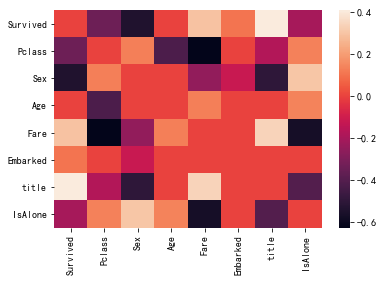

In [51]:
corr=df_s.corr()
corr[corr==1]=0#基本处理，让表格看起来更方便
corr[abs(corr)<0.1]=0

sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

# sns.pairplot(df_s,hue='Survived',size=10,diag_kind='kde')
# plt.savefig(r'D:\Data\Titanic Machine Learning from Disaster\df_s_corr.png')
corr_t=corr.round(4)
corr_t

**男性的存活率大约16%低于女性的26%**

Text(0.5,1,'不同性别的存活人数')

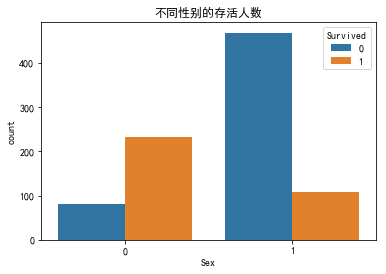

In [52]:
sns.countplot(x='Sex',hue='Survived',data=df_s).set_title('不同性别的存活人数')

## 数据的大致分布
***
- 年龄基本服从高斯分布，20到40岁的人居多
- 经济社会地位中第3等级的人最多，但是1和2的总人数和3相当
- SlibSp中0的最多，身边没有兄弟姐妹或者配偶
- Fare中取值一般都比较低
- Embarked很多都是在2号港口上船的
- Parch的分布和SliSp的分布基本一致，也是没有照看的人

In [53]:
# f, axes = plt.subplots(nrows=2,ncols=3, figsize=(15, 10))

# sns.distplot(df_s['Age'],kde=False,color='r',ax=axes[0][0]).set_title('Age')
# axes[0][0].set_ylabel('People Count')

# sns.distplot(df_s['Pclass'],kde=False,color='b',ax=axes[0][1]).set_title('Pclass')
# axes[0][1].set_ylabel('People Count')

# sns.distplot(df_s['SibSp'],kde=False,color='y',ax=axes[0][2]).set_title('SibSp')
# axes[0][2].set_ylabel('People Count')

# sns.distplot(df_s['Fare'],kde=False,color='y',ax=axes[1][0]).set_title('Fare')
# axes[1][0].set_ylabel('People Count')

# sns.distplot(df_s['Embarked'],kde=False,color='b',ax=axes[1][1]).set_title('Embarked')
# axes[1][1].set_ylabel('Sex')

# sns.distplot(df_s['Parch'],kde=False,color='r',ax=axes[1][2]).set_title('Parch')
# axes[1][2].set_ylabel('Parch')

 ## Survived VS Age
***
* 两条曲线的分布很相似，可以理解为年龄段人数多的地方，生存下来的人数和未幸存下来的人数也会多

Text(0.5,1,'Age Distribution-Survived VS not Survived')

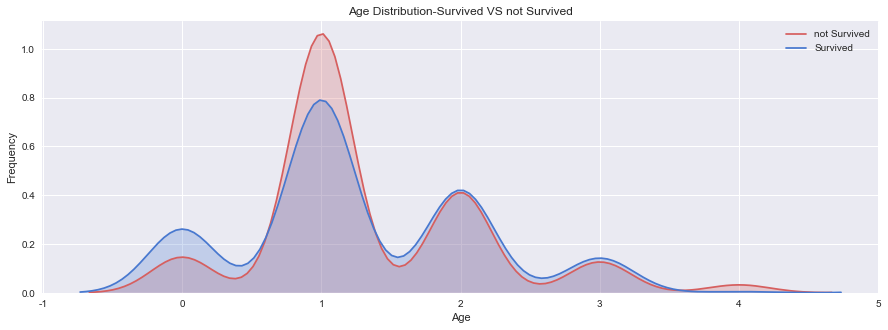

In [54]:
plt.figure(figsize=(15,5))
sns.set(palette='muted',color_codes=True)
ax=sns.kdeplot(data=df_s.loc[df_s['Survived']==0]['Age'],color='r',shade=True,label='not Survived')
ax=sns.kdeplot(data=df_s.loc[df_s['Survived']==1]['Age'],color='b',shade=True,label='Survived')
ax.set(xlabel='Age',ylabel='Frequency')
plt.title("Age Distribution-Survived VS not Survived")

## Survived VS Pclass
***
- 从图中可以看到第三等级的人中，存活的人数比率远远低于另外两个等级的

Text(0.5,1,'People survived or not survived  VS Pclass')

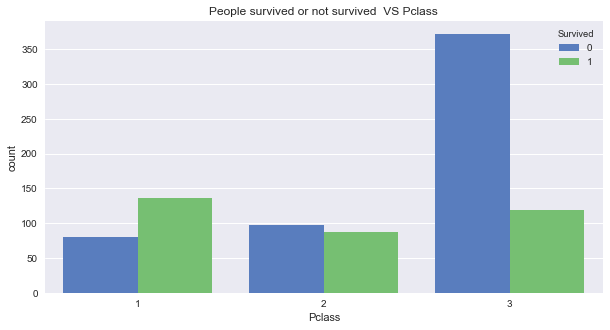

In [55]:
plt.figure(figsize=(10,5))
sns.countplot(x='Pclass',hue='Survived',data=df_s).set_title('People survived or not survived  VS Pclass')

## Survived VS Fare

Text(0.5,1,'Fare Distribution-Survived VS not Survived')

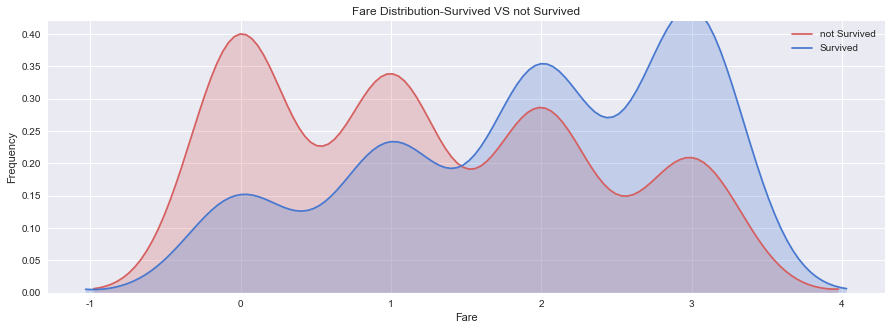

In [56]:
plt.figure(figsize=(15,5))
sns.set(palette='muted',color_codes=True)
ax=sns.kdeplot(data=df_s.loc[df_s['Survived']==0]['Fare'],color='r',shade=True,label='not Survived')
ax=sns.kdeplot(data=df_s.loc[df_s['Survived']==1]['Fare'],color='b',shade=True,label='Survived')
ax.set(xlabel='Fare',ylabel='Frequency')
plt.title("Fare Distribution-Survived VS not Survived")

In [57]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
x_predict=df_test
# 1. min max scaler
min_max_scaler = MinMaxScaler()
x_predict_min_max_scaled = min_max_scaler.fit_transform(x_predict)

# 2. standard scaler
std_scaler = StandardScaler()
x_predict_std_scaled = std_scaler.fit_transform(x_predict)

# 建立模型进行测试

In [79]:
from sklearn.model_selection import train_test_split#划分训练集和测试集
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
import pickle
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
X=df_s.drop(['Survived'],axis=1)
y=df_s['Survived']
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=1/4,random_state=0)

dtree = DecisionTreeClassifier(#测试不同属性的重要性
    max_depth=3,
    class_weight="balanced",
    min_weight_fraction_leaf=0.01
    )
dtree = dtree.fit(x_train,y_train)

## plot the importances ##
importances = dtree.feature_importances_
indices=np.argsort(-importances)
feat_names=['Pclass','Age','Fare','Sex']
print(importances[indices]) 
print(df_s.drop(['Survived'],axis=1).columns[indices])

[ 0.76106542  0.16314732  0.05510666  0.0124438   0.00823681  0.          0.        ]
Index(['title', 'Pclass', 'Fare', 'Age', 'IsAlone', 'Sex', 'Embarked'], dtype='object')


In [80]:
# 1. min max scaler
min_max_scaler = MinMaxScaler()
x_train_min_max_scaled = min_max_scaler.fit_transform(x_train)
x_test_min_max_scaled = min_max_scaler.transform(x_test)
X_test_min_max_scaled=min_max_scaler.transform(X)#整个数据集
# 2. standard scaler
std_scaler = StandardScaler()
x_train_std_scaled = std_scaler.fit_transform(x_train)
x_test_std_scaled = std_scaler.transform(x_test)
X_test_std_scaled=std_scaler.transform(X)

In [110]:
data={'特征没有归一化':[x_train,y_train,x_test,y_test],\
      '最小最大归一化':[x_train_min_max_scaled, y_train,x_test_min_max_scaled,y_test],\
      '标准归一化':[x_train_std_scaled,y_train,x_test_std_scaled, y_test]}
model_dict ={KNeighborsClassifier():{'n_neighbors': np.arange(1,16,1)},\
             LogisticRegression():{'C': np.arange(0.1, 4,0.1)},\
             SVC():{'C':  np.arange(0.1,5,0.1)},\
             DecisionTreeClassifier():{'max_depth': np.arange(3,10,1)},\
             RandomForestClassifier():{'n_estimators': np.arange(60,100,1)},
             GradientBoostingClassifier():{'learning_rate': np.arange(0.001,0.3,0.01)}}
name=['KNN','Logist','SVC','DT','RF','GBDT']
i=0
for model,parameters in model_dict.items():
    for key,item in data.items():
        clf=GridSearchCV(model,parameters,cv=6,scoring='accuracy')
        clf.fit(item[0],item[1])
        print('训练模型是：',name[i],'  ',key)
        print('最优参数：', clf.best_params_)
        print('验证集最高得分：', clf.best_score_)
        best_model = clf.best_estimator_
        test_acc=best_model.score(item[2], item[3])
        print('测试集上准确率：', test_acc)

        with open(r'D:\Data\model\{}.pkl'.format(model_name+key),'wb') as obj:
            pickle.dump(best_model,obj)
    i=i+1

训练模型是： KNN    特征没有归一化
最优参数： {'n_neighbors': 11}
验证集最高得分： 0.814371257485
测试集上准确率： 0.820627802691
训练模型是： KNN    最小最大归一化
最优参数： {'n_neighbors': 12}
验证集最高得分： 0.833832335329
测试集上准确率： 0.807174887892
训练模型是： KNN    标准归一化
最优参数： {'n_neighbors': 8}
验证集最高得分： 0.812874251497
测试集上准确率： 0.816143497758
训练模型是： Logist    特征没有归一化
最优参数： {'C': 3.2000000000000002}
验证集最高得分： 0.815868263473
测试集上准确率： 0.766816143498
训练模型是： Logist    最小最大归一化
最优参数： {'C': 2.9000000000000004}
验证集最高得分： 0.814371257485
测试集上准确率： 0.775784753363
训练模型是： Logist    标准归一化
最优参数： {'C': 0.5}
验证集最高得分： 0.814371257485
测试集上准确率： 0.775784753363
训练模型是： SVC    特征没有归一化
最优参数： {'C': 1.8000000000000003}
验证集最高得分： 0.824850299401
测试集上准确率： 0.784753363229
训练模型是： SVC    最小最大归一化
最优参数： {'C': 4.7999999999999998}
验证集最高得分： 0.826347305389
测试集上准确率： 0.789237668161
训练模型是： SVC    标准归一化
最优参数： {'C': 2.6000000000000001}
验证集最高得分： 0.826347305389
测试集上准确率： 0.811659192825
训练模型是： DT    特征没有归一化
最优参数： {'max_depth': 5}
验证集最高得分： 0.805389221557
测试集上准确率： 0.807174887892
训练模型是： DT    最小最大归一化


In [821]:
# predict_result=pd.DataFrame(columns=['PassengerId','Survived'])#建立预测表格
# predict_result['PassengerId']=passengerId
# predict_tem=pd.DataFrame()#各种模型的预测结果

# KNN=KNeighborsClassifier(n_neighbors=11)
# KNN.fit(X,y)
# KNN_pre=KNN.predict(x_predict)
# predict_tem['KNN']=KNN_pre

# LR=LogisticRegression(C=0.5)
# LR.fit(X_test_std_scaled,y)
# LR_pre=LR.predict(x_predict_std_scaled)
# predict_tem['LR']=LR_pre

# SVM=SVC(C=2.6000000000000001)
# SVM.fit(X_test_std_scaled,y)
# SVM_pre=LR.predict(x_predict_std_scaled)
# predict_tem['SVM']=SVM_pre

# DT=DecisionTreeClassifier(max_depth=5)
# DT.fit(X_test_std_scaled,y)
# DT_pre=DT.predict(x_predict_std_scaled)
# predict_tem['DT']=DT_pre

# RF=RandomForestClassifier(n_estimators=79)
# RF.fit(X_test_min_max_scaled,y)
# RF_pre=RF.predict(x_predict_min_max_scaled)
# predict_tem['RF']=RF_pre

# GBDT=GradientBoostingClassifier(learning_rate=0.20099999999999996)
# GBDT.fit(X_test_min_max_scaled,y)
# GBDT_pre=GBDT.predict(x_predict_min_max_scaled)
# predict_tem['GBDT']=GBDT_pre

# # ann_model = MLPClassifier(hidden_layer_sizes=[40, 40,40], activation='tanh', alpha=1,
# #                                   solver='lbfgs', random_state=0)
# # ann_model.fit(X_test_min_max_scaled,y)
# # ann_model_pre=ann_model.predict(x_predict_min_max_scaled)
# # predict_tem['ann_model']=ann_model_pre

# adbt=AdaBoostClassifier(DecisionTreeClassifier(max_depth=5, min_samples_split=20, min_samples_leaf=5),
#                          algorithm="SAMME",
#                          n_estimators=190, learning_rate=0.160)
# adbt.fit(X_test_min_max_scaled,y)
# adbt_pre=adbt.predict(x_predict)
# predict_tem['adbt']=adbt_pre

# predict_tem['SUM']=predict_tem.sum(axis=1)
# predict_tem.drop(['KNN','LR','SVM','DT','RF','GBDT','adbt'],axis=1,inplace=True)
# predict_tem[predict_tem<=5]=0
# predict_tem[predict_tem>=6]=1
# predict_result['Survived']=predict_tem['SUM']
# predict_result
# predict_result.to_csv(r'.\Titanic Machine Learning from Disaster\QuanTiresult_predict.csv',index=False)

In [ ]:
# activations = ['relu', 'logistic', 'tanh']
# alphas = [0.01, 0.1, 1, 10]

# results_df = pd.DataFrame(index=activations, columns=alphas)

# for activation in activations:
#     print('激活函数：{}'.format(activation))
#     for alpha in alphas:
#         ann_model = MLPClassifier(hidden_layer_sizes=[40, 40,40], activation=activations, alpha=alphas,
#                                   solver='lbfgs', random_state=0)
#         ann_model.fit(x_train, y_train)
#         print('alpha：{}'.format(alpha))
#         acc = ann_model.score(x_test, y_test)
#         print('准确率：{:.3f}'.format(acc))

# # results_df.loc[activation, alpha] = acc * 100
# # with open(r'D:\Data\model\神经网络.pkl','wb') as obj:
# #         pickle.dump(ann_model,obj)
# # print()

In [112]:
adbt=AdaBoostClassifier(DecisionTreeClassifier(max_depth=5, min_samples_split=20, min_samples_leaf=5),
                         algorithm="SAMME",
                         n_estimators=190, learning_rate=0.16)
adbt.fit(x_train,y_train)
print(adbt.score(x_test,y_test))
adbt_pre=adbt.predict(x_predict)

0.847533632287


## 组合各种模型进行预测

In [113]:

predict_result=pd.DataFrame(columns=['PassengerId','Survived'])#建立预测表格
predict_result['PassengerId']=passengerId

predict_tem=pd.DataFrame()#各种模型的预测结果
with open(r'.\model\kNN特征没有归一化.pkl','rb') as obj:
    model_KNN=pickle.load(obj)
predict=model_KNN.predict(x_predict)
predict_tem['KNN']=predict

with open(r'.\model\LR标准归一化.pkl','rb') as obj:
    model_LR=pickle.load(obj)
predict=model_LR.predict(x_predict_std_scaled)
predict_tem['LR']=predict

with open(r'.\model\SVM标准归一化.pkl','rb') as obj:
    model_SVM=pickle.load(obj)
predict=model_SVM.predict(x_predict_std_scaled)
predict_tem['SVM']=predict

with open(r'.\model\DT特征没有归一化.pkl','rb') as obj:
    model_DT=pickle.load(obj)
predict=model_DT.predict(x_predict_std_scaled)
predict_tem['DT']=predict

with open(r'.\model\RF最小最大归一化.pkl','rb') as obj:
    model_RF=pickle.load(obj)
predict=model_RF.predict(x_predict_min_max_scaled)
predict_tem['RF']=predict

with open(r'.\model\GBDT标准归一化.pkl','rb') as obj:
    model_GBDT=pickle.load(obj)
predict=model_GBDT.predict(x_predict_std_scaled)
predict_tem['GBDT']=predict

# with open(r'.\model\神经网络.pkl','rb') as obj:
#     model_MLPC=pickle.load(obj)
# predict=model_MLPC.predict(x_predict)
# predict_tem['MLPC']=predict

predict_tem['ADBT']=adbt_pre
predict_tem['SUM']=predict_tem.sum(axis=1)
predict_tem.drop(['KNN','LR','SVM','DT','RF','GBDT','ADBT'],axis=1,inplace=True)
predict_tem[predict_tem<=5]=0
predict_tem[predict_tem>=6]=1
predict_result['Survived']=predict_tem['SUM']
predict_result
predict_result.to_csv(r'.\Titanic Machine Learning from Disaster\result_predict.csv',index=False)

In [817]:
#组合预测
df1=pd.read_csv(r'.\Titanic Machine Learning from Disaster\0.7325gender_submission.csv')
df2=pd.read_csv(r'.\Titanic Machine Learning from Disaster\0.77511gender_submission.csv')
df3=pd.read_csv(r'.\Titanic Machine Learning from Disaster\0.77990result_predict.csv')
df4=pd.read_csv(r'.\Titanic Machine Learning from Disaster\result_predict.csv')
predict_result=pd.DataFrame(columns=['PassengerId','Survived'])#建立预测表格
predict_result['PassengerId']=passengerId
predict_tem=pd.DataFrame()#各种模型的预测结果
predict_tem['one']=df1['Survived']
predict_tem['two']=df2['Survived']
predict_tem['three']=df3['Survived']
predict_tem['four']=df4['Survived']
predict_tem['SUM']=predict_tem.sum(axis=1)
predict_tem.drop(['one','two','three','four'],axis=1,inplace=True)
predict_tem[predict_tem<=6]=0
predict_tem[predict_tem>=7]=1
predict_result['Survived']=predict_tem['SUM']
predict_result
predict_result.to_csv(r'.\Titanic Machine Learning from Disaster\zongde_result_predict.csv',index=False)